In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()  
X_train, X_test = X_train / 255.0, X_test / 255.0 


In [3]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))


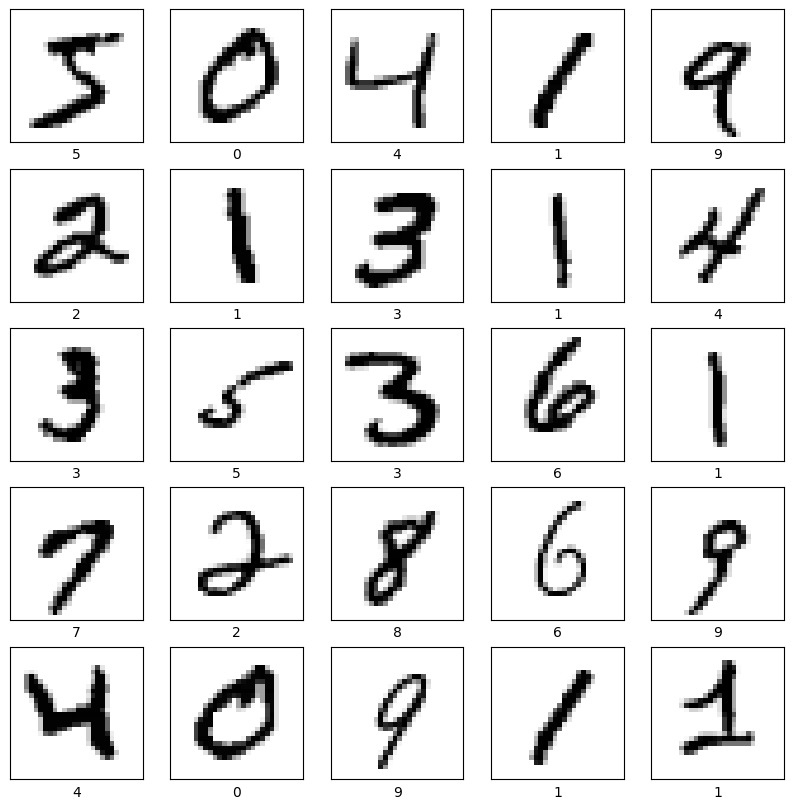

In [4]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [16]:
class NeuralNetwork:
  """
  A class representing a simple neural network.

  Parameters:
  - input_size (int): The number of input features.
  - hidden_size (int): The number of neurons in the hidden layer.
  - output_size (int): The number of output classes.

  Attributes:
  - input_size (int): The number of input features.
  - hidden_size (int): The number of neurons in the hidden layer.
  - output_size (int): The number of output classes.
  - W1 (ndarray): The weight matrix connecting the input layer to the hidden layer.
  - b1 (ndarray): The bias vector for the hidden layer.
  - W2 (ndarray): The weight matrix connecting the hidden layer to the output layer.
  - b2 (ndarray): The bias vector for the output layer.

  Methods:
  - forward(X): Performs forward propagation and returns the predicted probabilities.
  - backward(X, y, learning_rate): Performs backward propagation and updates the weights and biases.
  - train(X, y, learning_rate, epochs): Trains the neural network using the given data.
  - predict(X): Predicts the class labels for the given input data.

  """

  def __init__(self, input_size, hidden_size, output_size):
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size

    self.W1 = np.random.randn(self.input_size, self.hidden_size)
    self.b1 = np.zeros((1, self.hidden_size))
    self.W2 = np.random.randn(self.hidden_size, self.output_size)
    self.b2 = np.zeros((1, self.output_size))


  def forward(self, X):
    """
    Performs forward propagation and returns the predicted probabilities.

    Parameters:
    - X (ndarray): The input data of shape (num_samples, input_size).

    Returns:
    - ndarray: The predicted probabilities of shape (num_samples, output_size).

    """
    self.z1 = np.dot(X, self.W1) + self.b1
    self.a1 = np.maximum(0, self.z1)
    self.z2 = np.dot(self.a1, self.W2) + self.b2
    # Subtracting the maximum value
    exp_scores = np.exp(self.z2 - np.max(self.z2, axis=1, keepdims=True))
    self.probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return self.probs


  def backward(self, X, y, learning_rate):
    """
    Performs backward propagation and updates the weights and biases.

    Parameters:
    - X (ndarray): The input data of shape (num_samples, input_size).
    - y (ndarray): The true labels of shape (num_samples,).
    - learning_rate (float): The learning rate for updating the weights and biases.

    """
    m = X.shape[0]
    delta3 = self.probs
    delta3[range(m), y] -= 1
    delta3 /= m

    dW2 = np.dot(self.a1.T, delta3)
    db2 = np.sum(delta3, axis=0, keepdims=True)

    delta2 = np.dot(delta3, self.W2.T)
    delta2[self.a1 <= 0] = 0

    dW1 = np.dot(X.T, delta2)
    db1 = np.sum(delta2, axis=0)

    self.W1 -= learning_rate * dW1
    self.b1 -= learning_rate * db1
    self.W2 -= learning_rate * dW2
    self.b2 -= learning_rate * db2

  def train(self, X, y, learning_rate, epochs):
    """
    Trains the neural network using the given data.

    Parameters:
    - X (ndarray): The input data of shape (num_samples, input_size).
    - y (ndarray): The true labels of shape (num_samples,).
    - learning_rate (float): The learning rate for updating the weights and biases.
    - epochs (int): The number of training epochs.

    """
    for epoch in range(epochs):
      self.forward(X)
      self.backward(X, y, learning_rate)

  def predict(self, X):
    """
    Predicts the class labels for the given input data.

    Parameters:
    - X (ndarray): The input data of shape (num_samples, input_size).

    Returns:
    - ndarray: The predicted class labels of shape (num_samples,).

    """
    return np.argmax(self.forward(X), axis=1)


In [6]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

In [10]:
input_size = 784
hidden_size = input_size * 2
output_size = 10
learning_rate = 0.7
epochs = 100

model = NeuralNetwork(input_size, hidden_size, output_size)

model.train(X_train, y_train, learning_rate, epochs)

train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
val_accuracy = accuracy_score(y_val, val_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9178125
Validation Accuracy: 0.8909166666666667
Test Accuracy: 0.896


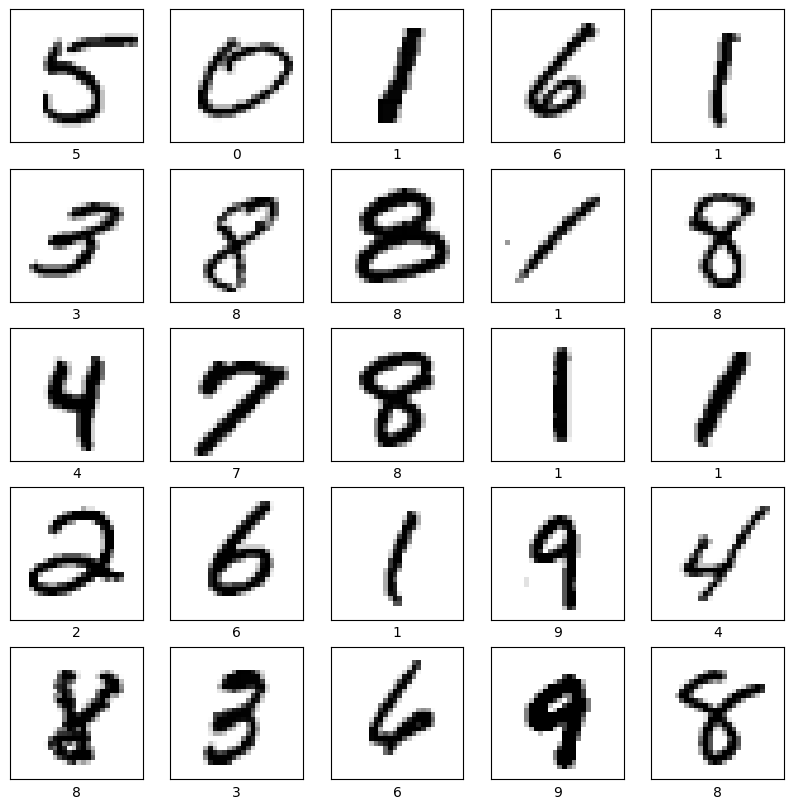

In [11]:

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

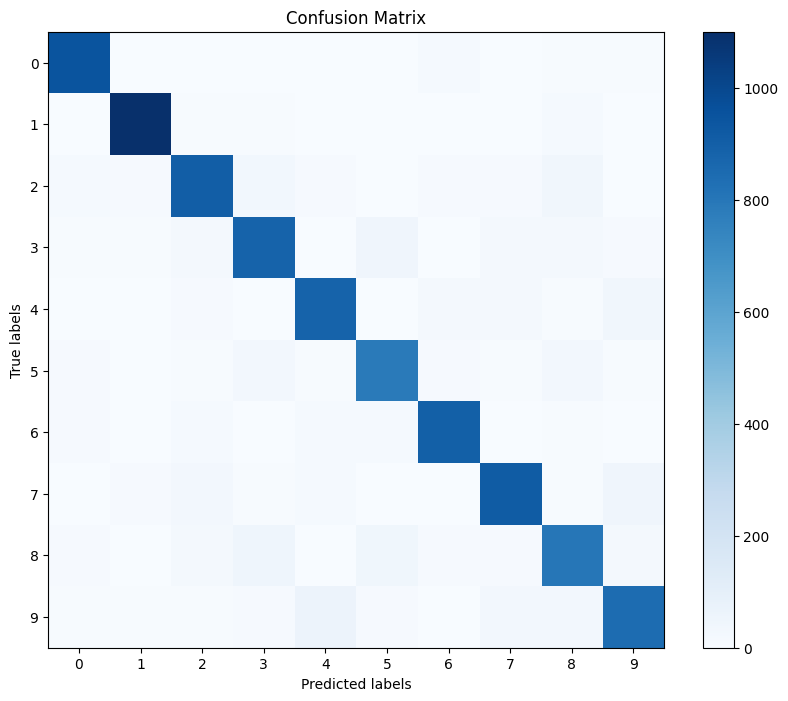

In [12]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.title('Confusion Matrix')
plt.show()